In [40]:
%matplotlib inline
import pickle
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from cycler import cycler
from pathlib import Path


path_dynamics = '../../files/dynamics/TirozziTsodyks/Fig1/'
path_mft = '../../files/MFT/TirozziTsodyks/'

path_save = 'panels/'
Path(path_save).mkdir(parents=True, exist_ok=True)





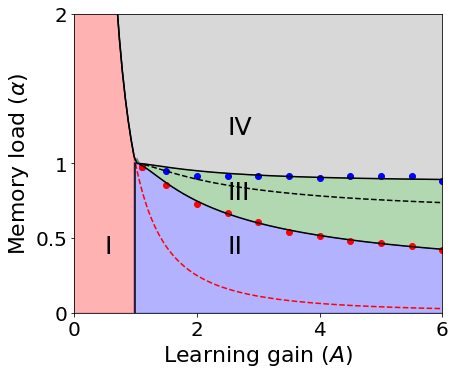

In [56]:


N = 10 * 1000000
K = 2 * np.log(N)

A_val = [1.1,1.5, 2.0, 2.5, 3, 3.5,4.,4.5,5, 5.5, 6]
alpha_cap =[31.5/K, 30.5/K, 29.5/K, 29.5/K, 29.5/K,29.5/K,29/K,29.5/K,29.5/K, 29.5/K,28.5/K]
A_val_chaos = A_val
alpha_chaos = [31.5/K, 27.5/K,23.5/K, 21.5/K, 19.5/K, .54,16.5/K,15.5/K,15./K,14.5/K, 13.5/K]





t_ch = [0.74,0.6,0.51]
ind_ch = [17,13,11]



myAA,trans_fxd =  pickle.load(open(path_mft +'trans_fxd.p','rb'),encoding = 'latin1')
myAA,trans_bckg =  pickle.load(open(path_mft +'trans_bckg.p','rb'),encoding = 'latin1')
myAA,cap_SMFT_TT =  pickle.load(open(path_mft + 'cap_SMFT.p','rb'),encoding = 'latin1')
myAA,cap_DMFT =  pickle.load(open(path_mft + 'cap_DMFT.p','rb'),encoding = 'latin1')
#
myAA =  np.array(myAA)
trans_fxd = np.array(trans_fxd)
trans_bckg = np.array(trans_bckg)
cap_DMFT = np.array(cap_DMFT)

# filling the Nans
cap_DMFT[-11:-1] = trans_bckg[-11:-1]


# modify for plotting for large A
trans_bckg_plot =np.array(list(trans_bckg) + list(2.5 * np.ones(20)))
trans_fxd_plot =np.array(trans_fxd)
trans_fxd_plot[myAA<1.] = 1.


myAA_plot =np.array( list(myAA) + list(np.linspace(np.min(myAA)-0.05,0,20)))

fig = plt.figure(figsize=(15.5, 5.5))
gs = gridspec.GridSpec(1,1)
gs.update(left = 0.05,right = 0.38,wspace=0.01,hspace=0.1)

ax_bif = plt.subplot(gs[0,0])

plt.plot(A_val, alpha_cap,'bo')
plt.plot(A_val_chaos,alpha_chaos,'ro')

ax_bif.plot(myAA[myAA<=1],trans_bckg[myAA<=1],color='k',label = 'Chaos background')
ax_bif.plot(myAA[0.96<=myAA],trans_bckg[0.96<=myAA],color='r',ls = '--',alpha = 1.)
ax_bif.plot(myAA[1.03<myAA],trans_fxd[1.03<myAA],color='k',label= 'Chaos retrieval')
ax_bif.plot(myAA,cap_SMFT_TT,color='k',ls='--',label = 'Capacity SMFT')
ax_bif.plot(myAA,cap_DMFT,color='k',label = 'Capacity DMFT')
ax_bif.axvline(x = 1,ymin = 0,ymax = 0.5,color = 'k')

ax_bif.fill_between(myAA_plot[myAA_plot<=1.01],np.zeros(len(myAA_plot[myAA_plot<=1.01])),trans_bckg_plot[myAA_plot<=1.01],color='r',alpha=0.3)
ax_bif.fill_between(myAA[0.97<=myAA],np.zeros(len(myAA[0.97<=myAA])),trans_fxd_plot[0.97<=myAA],color='b',alpha=0.3)
#ax_bif.fill_between(myAA[0.99<myAA],trans_bckg[0.99<myAA],trans_fxd[0.99<myAA],color='r',alpha=0.3)
ax_bif.fill_between(myAA[1.02<myAA],trans_fxd[1.02<myAA],cap_DMFT[1.02<myAA],color='g',alpha=0.3)
ax_bif.fill_between(myAA,cap_DMFT,2.5 * np.ones(len(myAA)),color='gray',alpha=0.3)
#ax_bif.fill_between(myAA[myAA<],trans,2.5 * np.ones(len(myAA)),color='gray',alpha=0.3)
#plt.plot(myA,cap_SMFT_TT,color='b')



N = 1000000
K = 2 * np.log(N)
#ax_bif.plot(taus,cap_DMFT,color='g',label = 'Capacity DMFT')
#ax_bif.fill_between(taus,cap_DMFT,10 * np.ones(len(taus)),color='r',alpha=0.3)
ax_bif.text(0.5,11./K,'I',fontsize = 25)
ax_bif.text(2.5,11./K,'II',fontsize = 25)
ax_bif.text(2.5,21./K,'III',fontsize = 25)
ax_bif.text(2.5,33./K,'IV',fontsize = 25)




#ax_bif.axhline(y=0.4,xmin=0,xmax=0.4, color='gray', linestyle='--')
ax_bif.set_ylim(0,2)
ax_bif.set_xlim(0,6)

ax_bif.set_xticks([0,2,4,6])
ax_bif.set_xticklabels([0,2,4,6],fontsize = 20)
ax_bif.set_yticks([0,.5,1,2])
ax_bif.set_yticklabels([0,.5, 1,2],fontsize = 20)
ax_bif.set_xlabel(r'Learning gain ($A$)',fontsize = 22)
ax_bif.set_ylabel(r'Memory load ($\alpha$)',fontsize = 22)
#ax_bif.legend(loc='upper right',fontsize = 15)



plt.savefig(path_save + 'bifurcation_diagram_tt.pdf', bbox_inches='tight')




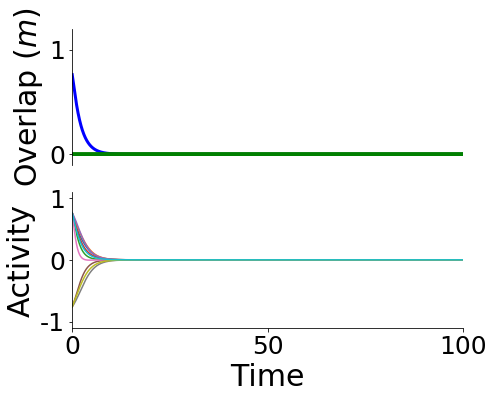

In [52]:
#Panel I
N = 1000000
alpha_values = np.arange(0.02, 1.06, 0.02)
K = 2 * np.log(N)
p = 11
alpha  = round(p/K, 2)
for s in range(0,1):
    dyn_TT = pickle.load(open(path_dynamics +'retrieval_N_'+str(int(N/1000))+'K_seed_'+str(s)+'_p_'+str(p)+'_A_0.5.p','rb'))
    dynamics =np.tanh(dyn_TT['dynamics']['dyn'][:,0,0:10])
    T = (dyn_TT['dynamics']['overlaps'].shape[0] * 0.5)/20.
    overlaps = dyn_TT['dynamics']['overlaps']
    all_ovs = dyn_TT['dynamics']['q_all']
    time = np.linspace(0,T, dyn_TT['dynamics']['overlaps'].shape[0])
    time_ovs = np.linspace(0,T, dyn_TT['dynamics']['q_all'].shape[0])




slabel = 30
sticks = 25
fig = plt.figure(figsize=(7, 5.5))
gs1 = gridspec.GridSpec(2,1)
#
ax_o = plt.subplot(gs1[0,0])
ax_d = plt.subplot(gs1[1,0])

lw = 3
yticks = [0,1]
ax_o.plot(time, overlaps,lw=lw, color = 'b')
ax_o.plot(time_ovs, all_ovs[:, 1:-1],lw=lw, color = 'g')
ax_o.set_xticks([])
ax_o.set_yticks([0,1])
ax_o.set_ylim([-0.1,1.2])
ax_o.set_xlim([0,100])
ax_o.set_yticks(yticks)
ax_o.set_yticklabels(yticks,fontsize = sticks)
ax_o.set_ylabel(r'Overlap ($m$)',fontsize = slabel)
ax_o.spines['right'].set_visible(False)
ax_o.spines['top'].set_visible(False)
ax_o.spines['bottom'].set_visible(False)
#ax_o_1_i.set_title(r'Fixed-point',fontsize = 15)
#ax_o_1_i.plot([3900],[1.1],'ko',ms =15,markerfacecolor = 'None')
#
yticks = [-1,0,1]
ax_d.plot(time, dynamics)
ax_d.set_yticks([-1,0,1])
ax_d.set_ylim([-1.1,1.1])
xticks =[0,50,100]
ax_d.set_xticks([0,50,100])
ax_d.set_xlim([0,100])
ax_d.set_xticklabels(xticks,fontsize = sticks)
ax_d.set_yticklabels(yticks,fontsize = sticks)
ax_d.set_xlabel(r'Time',fontsize = slabel)
ax_d.set_ylabel(r'Activity',fontsize = slabel)
ax_d.spines['right'].set_visible(False)
ax_d.spines['top'].set_visible(False)

plt.savefig(path_save +'panel_I.pdf', bbox_inches='tight',transparent=True)
#plt.close()



11 0.3981032750779809


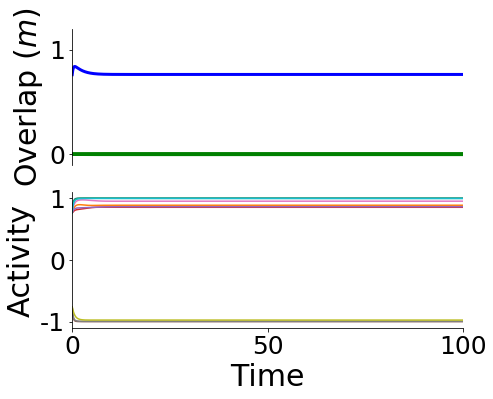

In [51]:
#Panel II
N = 1000000
alpha_values = np.arange(0.02, 1.06, 0.02)
K = 2 * np.log(N)
p = 11
alpha  = round(p/K, 2)
print(p, p/K)
for s in range(0,1):
    dyn_TT = pickle.load(open(path_dynamics +'retrieval_N_'+str(int(N/1000))+'K_seed_'+str(s)+'_p_'+str(p)+'_A_2.5.p','rb'))
    dynamics =np.tanh(dyn_TT['dynamics']['dyn'][:,0,0:10])
    T = (dyn_TT['dynamics']['overlaps'].shape[0] * 0.5)/20.
    overlaps = dyn_TT['dynamics']['overlaps']
    all_ovs = dyn_TT['dynamics']['q_all']
    time = np.linspace(0,T, dyn_TT['dynamics']['overlaps'].shape[0])
    time_ovs = np.linspace(0,T, dyn_TT['dynamics']['q_all'].shape[0])




slabel = 30
sticks = 25
fig = plt.figure(figsize=(7, 5.5))
gs1 = gridspec.GridSpec(2,1)
#
ax_o = plt.subplot(gs1[0,0])
ax_d = plt.subplot(gs1[1,0])

lw = 3
yticks = [0,1]
ax_o.plot(time, overlaps,lw=lw, color = 'b')
ax_o.plot(time_ovs, all_ovs[:, 1:-1],lw=lw, color = 'g')
ax_o.set_xticks([])
ax_o.set_yticks([0,1])
ax_o.set_ylim([-0.1,1.2])
ax_o.set_xlim([0,100])
ax_o.set_yticks(yticks)
ax_o.set_yticklabels(yticks,fontsize = sticks)
ax_o.set_ylabel(r'Overlap ($m$)',fontsize = slabel)
ax_o.spines['right'].set_visible(False)
ax_o.spines['top'].set_visible(False)
ax_o.spines['bottom'].set_visible(False)
#ax_o_1_i.set_title(r'Fixed-point',fontsize = 15)
#ax_o_1_i.plot([3900],[1.1],'ko',ms =15,markerfacecolor = 'None')
#
yticks = [-1,0,1]
ax_d.plot(time, dynamics)
ax_d.set_yticks([-1,0,1])
ax_d.set_ylim([-1.1,1.1])
xticks =[0,50,100]
ax_d.set_xticks([0,50,100])
ax_d.set_xlim([0,100])
ax_d.set_xticklabels(xticks,fontsize = sticks)
ax_d.set_yticklabels(yticks,fontsize = sticks)
ax_d.set_xlabel(r'Time',fontsize = slabel)
ax_d.set_ylabel(r'Activity',fontsize = slabel)
ax_d.spines['right'].set_visible(False)
ax_d.spines['top'].set_visible(False)

plt.savefig(path_save +'panel_II.pdf', bbox_inches='tight',transparent=True)
#plt.close()



21 0.7600153433306908


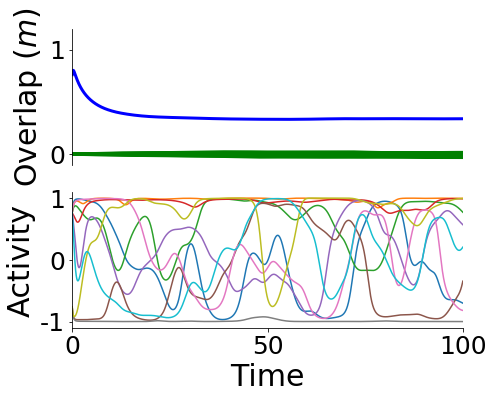

In [45]:

#Panel III
N = 1000000
alpha_values = np.arange(0.02, 1.06, 0.02)
K = 2 * np.log(N)
p = 21
alpha  = round(p/K, 2)
print(p, p/K)
for s in range(0,1):
    dyn_TT = pickle.load(open(path_dynamics +'retrieval_N_'+str(int(N/1000))+'K_seed_'+str(s)+'_p_'+str(p)+'_A_2.5.p','rb'))
    dynamics =np.tanh(dyn_TT['dynamics']['dyn'][:,0,0:10])
    T = (dyn_TT['dynamics']['overlaps'].shape[0] * 0.5)/20.
    overlaps = dyn_TT['dynamics']['overlaps']
    all_ovs = dyn_TT['dynamics']['q_all']
    time = np.linspace(0,T, dyn_TT['dynamics']['overlaps'].shape[0])
    time_ovs = np.linspace(0,T, dyn_TT['dynamics']['q_all'].shape[0])




slabel = 30
sticks = 25
fig = plt.figure(figsize=(7, 5.5))
gs1 = gridspec.GridSpec(2,1)
#
ax_o = plt.subplot(gs1[0,0])
ax_d = plt.subplot(gs1[1,0])

lw = 3
yticks = [0,1]
ax_o.plot(time, overlaps,lw=lw, color = 'b')
ax_o.plot(time_ovs, all_ovs[:, 1:-1],lw=lw, color = 'g')
ax_o.set_xticks([])
ax_o.set_yticks([0,1])
ax_o.set_ylim([-0.1,1.2])
ax_o.set_xlim([0,100])
ax_o.set_yticks(yticks)
ax_o.set_yticklabels(yticks,fontsize = sticks)
ax_o.set_ylabel(r'Overlap ($m$)',fontsize = slabel)
ax_o.spines['right'].set_visible(False)
ax_o.spines['top'].set_visible(False)
ax_o.spines['bottom'].set_visible(False)
#ax_o_1_i.set_title(r'Fixed-point',fontsize = 15)
#ax_o_1_i.plot([3900],[1.1],'ko',ms =15,markerfacecolor = 'None')
#
yticks = [-1,0,1]
ax_d.plot(time, dynamics)
ax_d.set_yticks([-1,0,1])
ax_d.set_ylim([-1.1,1.1])
xticks =[0,50,100]
ax_d.set_xticks([0,50,100])
ax_d.set_xlim([0,100])
ax_d.set_xticklabels(xticks,fontsize = sticks)
ax_d.set_yticklabels(yticks,fontsize = sticks)
ax_d.set_xlabel(r'Time',fontsize = slabel)
ax_d.set_ylabel(r'Activity',fontsize = slabel)
ax_d.spines['right'].set_visible(False)
ax_d.spines['top'].set_visible(False)

plt.savefig(path_save +'panel_III.pdf', bbox_inches='tight',transparent=True)
#plt.close()



33 1.1943098252339426


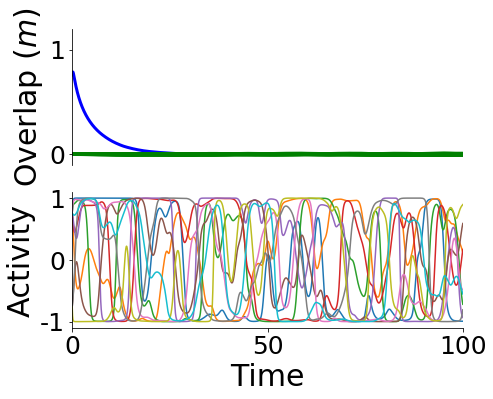

In [50]:
#Panel IV
N = 1000000
alpha_values = np.arange(0.02, 1.06, 0.02)
K = 2 * np.log(N)
p = 33
alpha  = round(p/K, 2)
print(p, p/K)
for s in range(0,1):
    dyn_TT = pickle.load(open(path_dynamics +'retrieval_N_'+str(int(N/1000))+'K_seed_'+str(s)+'_p_'+str(p)+'_A_2.5.p','rb'))
    dynamics =np.tanh(dyn_TT['dynamics']['dyn'][:,0,0:10])
    T = (dyn_TT['dynamics']['overlaps'].shape[0] * 0.5)/20.
    overlaps = dyn_TT['dynamics']['overlaps']
    all_ovs = dyn_TT['dynamics']['q_all']
    time = np.linspace(0,T, dyn_TT['dynamics']['overlaps'].shape[0])
    time_ovs = np.linspace(0,T, dyn_TT['dynamics']['q_all'].shape[0])




slabel = 30
sticks = 25
fig = plt.figure(figsize=(7, 5.5))
gs1 = gridspec.GridSpec(2,1)
#
ax_o = plt.subplot(gs1[0,0])
ax_d = plt.subplot(gs1[1,0])

lw = 3
yticks = [0,1]
ax_o.plot(time, overlaps,lw=lw, color = 'b')
ax_o.plot(time_ovs, all_ovs[:, 1:-1],lw=lw, color = 'g')
ax_o.set_xticks([])
ax_o.set_yticks([0,1])
ax_o.set_ylim([-0.1,1.2])
ax_o.set_xlim([0,100])
ax_o.set_yticks(yticks)
ax_o.set_yticklabels(yticks,fontsize = sticks)
ax_o.set_ylabel(r'Overlap ($m$)',fontsize = slabel)
ax_o.spines['right'].set_visible(False)
ax_o.spines['top'].set_visible(False)
ax_o.spines['bottom'].set_visible(False)
#ax_o_1_i.set_title(r'Fixed-point',fontsize = 15)
#ax_o_1_i.plot([3900],[1.1],'ko',ms =15,markerfacecolor = 'None')
#
yticks = [-1,0,1]
ax_d.plot(time, dynamics)
ax_d.set_yticks([-1,0,1])
ax_d.set_ylim([-1.1,1.1])
xticks =[0,50,100]
ax_d.set_xticks([0,50,100])
ax_d.set_xlim([0,100])
ax_d.set_xticklabels(xticks,fontsize = sticks)
ax_d.set_yticklabels(yticks,fontsize = sticks)
ax_d.set_xlabel(r'Time',fontsize = slabel)
ax_d.set_ylabel(r'Activity',fontsize = slabel)
ax_d.spines['right'].set_visible(False)
ax_d.spines['top'].set_visible(False)

plt.savefig(path_save +'panel_IV.pdf', bbox_inches='tight',transparent=True)
#plt.close()

